In [1]:
import pandas as pd
import datetime

In [2]:
intraday = pd.DataFrame(columns=['date', 'price'])

In [3]:
with open("additional_data/4_aapl.txt", "r") as stock:
    for line in stock:
        el = line.split(" ")[0]+" "+ line.split(" ")[1]
        data = datetime.datetime.strptime(line.split(" ")[0]+" "+ line.split(" ")[1], '%Y-%m-%d %H:%M:%S')
        intraday = intraday.append({'date': data, 'price': float(line.split(" ")[-1].strip())}, ignore_index=True)

In [4]:
intraday.head()

,date,price
0,2016-01-04 09:45:00,100.021
1,2016-01-04 09:46:00,100.129
2,2016-01-04 09:47:00,100.399
3,2016-01-04 09:48:00,100.286
4,2016-01-04 09:49:00,100.343


In [5]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20.0, 10.0)


period_df = intraday#[(intraday['date'] > '2016-02-01') & (intraday['date'] < '2016-03-01')]

plt.plot(period_df['date'], period_df['price'].astype(float))
# beautify the x-labels
plt.gcf().autofmt_xdate()

plt.show()

In [6]:
period_df.tail()

,date,price
90158,2016-12-30 15:41:00,115.240
90159,2016-12-30 15:42:00,115.201
90160,2016-12-30 15:43:00,115.151
90161,2016-12-30 15:44:00,115.091
90162,2016-12-30 15:45:00,115.101


In [7]:
daily = pd.DataFrame(columns=['date', 'open', 'high', 'low', 'close'])

d = intraday['date'].values[0]


cur_day = pd.to_datetime(d).date().day
prices = list()
for idx, el in enumerate(intraday['date'].values):
    if pd.to_datetime(el).date().day == cur_day:
        prices.append(intraday['price'].values[idx])
    else:
        daily = daily.append({'date': pd.to_datetime(intraday['date'].values[idx-1]), 'open': prices[0], 'high': max(prices), 'low': min(prices), 'close': prices[-1]}, ignore_index=True)
        prices = list()
        prices.append(intraday['price'].values[idx])
        cur_day = pd.to_datetime(el).date().day

In [8]:
daily.head()

,date,open,high,low,close
0,2016-01-04 15:45:00,100.0210,102.6220,99.8168,102.1300
1,2016-01-05 15:45:00,102.0840,102.1540,99.7876,100.0120
2,2016-01-06 15:45:00,98.3461,99.6902,97.4120,97.8785
3,2016-01-07 15:45:00,95.9694,97.4889,94.0896,94.6545
4,2016-01-08 15:45:00,95.2097,96.5120,94.2844,94.6253


Populating the interactive namespace from numpy and matplotlib


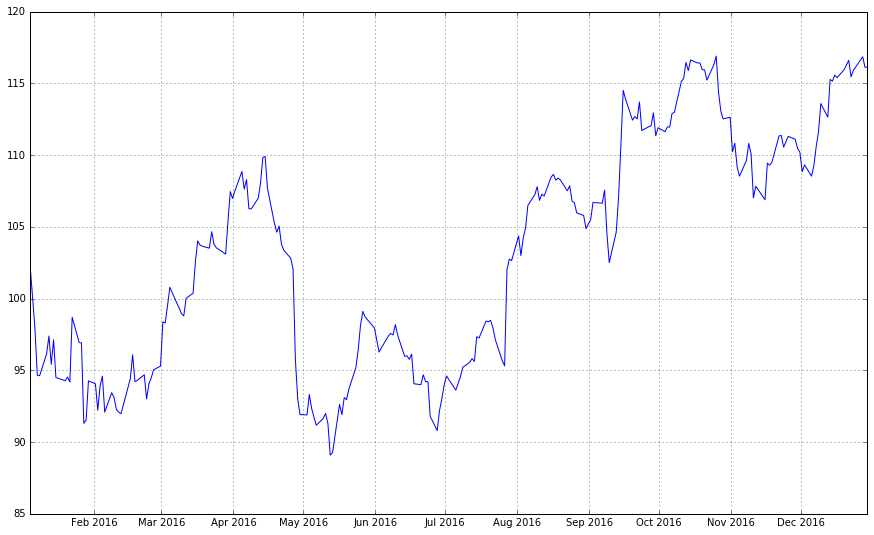

In [9]:
import matplotlib.pyplot as plt   # Import matplotlib
# This line is necessary for the plot to appear in a Jupyter notebook
%matplotlib inline
# Control the default size of figures in this Jupyter notebook
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 9)   # Change the size of plots
plt.grid(True)
#daily["close"].plot(grid = True) # Plot the adjusted closing price of AAPL

plt.plot(daily['date'], daily['close'])

/home/ostapkharysh/.local/lib/python3.5/site-packages/ipykernel_launcher.py:14: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  


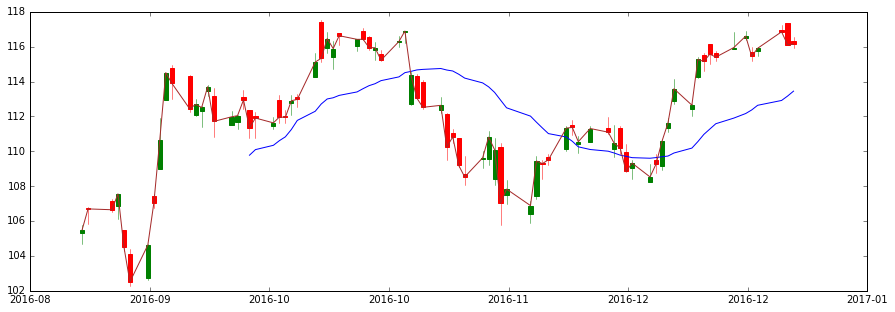

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from matplotlib.finance import candlestick_ohlc

import matplotlib.dates as mdates


df = daily.copy()

start = datetime.datetime.strptime("2016-09-01", '%Y-%m-%d').date()
finish = datetime.datetime.strptime("2016-12-31", '%Y-%m-%d').date()

df = df[(df['date'] >= start) & (df['date'] <= finish)]

# Converting date to pandas datetime format
df['date'] = pd.to_datetime(df['date'])
df["date"] = df["date"].apply(mdates.date2num)

ohlc= df[['date', 'open', 'high', 'low','close']].copy()

ohlc['SMA20'] = ohlc["close"].rolling(20).mean()
f1, ax = plt.subplots(figsize = (15,5))

# plot the candlesticks
candlestick_ohlc(ax, ohlc.values, width=.7, colorup='green', colordown='red')
#ax.plot(ohlc['date'], ohlc['SMA5'], color = 'green', label = 'SMA5')
ax.plot(ohlc['date'], ohlc['SMA20'], color = 'blue', label = 'SMA20')
ax.plot(ohlc['date'], ohlc['close'], color = "brown", label = 'close')

ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
# Saving image
#plt.savefig('OHLC.png')

plt.show()


In [12]:
"""
#SQLLITE
import sqlite3



conn = sqlite3.connect("////media/ostapkharysh/SP_PHD_U3/database/NO_title.db")
c = conn.cursor()


sql = '''SELECT DATE, TONE, DOCUMENTIDENTIFIER FROM news where date >= 20160104090000 and date <= 20160105181500'''
res = c.execute(sql)


"""
#SQLALCHEMY
from sqlalchemy import create_engine
from sqlalchemy import inspect, select, MetaData, and_

db_uri = 'sqlite:////media/ostapkharysh/SP_PHD_U3/database/NO_title.db'
engine = create_engine(db_uri)
conn = engine.connect()

inspector = inspect(engine)

# Get table information

meta = MetaData(engine,reflect=True)
table = meta.tables['news']

#print(inspector.get_table_names())
#print(inspector.get_columns('news'))

select_st = select([table.c.DATE, table.c.TONE, table.c.DOCUMENTIDENTIFIER]).where(and_(table.c.DATE >= '20160701010000', table.c.DATE <= '20160830181500'))
res = conn.execute(select_st)  #.fetchall()   


/home/ostapkharysh/.local/lib/python3.5/site-packages/ipykernel_launcher.py:31: SADeprecationWarning: reflect=True is deprecate; please use the reflect() method.


In [13]:
unf_TONE = pd.DataFrame({"date": [], "tone": [], "source": []})

In [14]:
for idx, el in enumerate(res):
    unf_TONE.loc[idx] = pd.Series({"date": el[0], "tone": el[1].split(',')[0], "source": el[2]})
    #unf_TONE = unf_TONE.append({'date': el[0], 'tone': el[1].split(',')[0], 'source': el[2]}, ignore_index=True)

In [20]:
unf_TONE.head()

,date,source,tone
0,20160701010000,http://warm1069.com/man-claims-he-invented-the...,1.05820105820106
1,20160701010000,http://www.techradar.com/news/world-of-tech/wh...,-0.840336134453781
2,20160701010000,http://www.wfmynews2.com/news/nation-now/repor...,-1.53846153846154
3,20160701010000,http://www.kare11.com/news/nation-now/report-a...,-1.53846153846154
4,20160701010000,http://www.wgrz.com/news/nation-now/report-app...,-1.53846153846154


In [23]:
TONE = pd.DataFrame({"date": [], "tone": []})
count = 0
for idx, el in enumerate(unf_TONE.values):
    if 'apple' in el[1]:
        data = unf_TONE.loc[idx]
        TONE.loc[count] = pd.Series({"date": datetime.datetime.strptime(data[0], '%Y%m%d%H%M%S'), "tone": float(data[2])})
        count+=1
        #TONE = TONE.append({"date": datetime.datetime.strptime(el[0], '%Y%m%d%H%M%S'), "tone" : float(el[2])}, ignore_index=True )

In [25]:
TONE.head()

,date,tone
0,2016-07-01 01:00:00,1.058201
1,2016-07-01 01:00:00,-0.840336
2,2016-07-01 01:00:00,-1.538462
3,2016-07-01 01:00:00,-1.538462
4,2016-07-01 01:00:00,-1.538462


In [26]:
TONE_15_M = pd.DataFrame({'date': [], 'tone': []})

d = TONE.values[0][0]
tones = list()
count = 0

for el in TONE.values:
    if el[0] == d:
        tones.append(float(el[1]))
    else:
        TONE_15_M.loc[count] = pd.Series({"date": d, "tone": float(sum(tones)/len(tones))})
        #TONE_15_M =TONE_15_M.append({'date': d, 'tone': float(sum(tones)/len(tones))},  ignore_index=True)
        d = el[0]
        tones = list()
        
        tones.append(float(el[1]))
        count += 1

TONE_15_M.loc[count] = pd.Series({"date": d, "tone": float(sum(tones)/len(tones))})
#TONE_15_M = TONE_15_M.append({'date': d, 'tone': float(sum(tones)/len(tones))}, ignore_index=True)

In [27]:
TONE_15_M.head()

,date,tone
0,2016-07-01 01:00:00,0.517254
1,2016-07-01 01:30:00,1.139029
2,2016-07-01 01:45:00,-1.741029
3,2016-07-01 02:00:00,-1.124130
4,2016-07-01 02:15:00,-0.002598


In [28]:
intraday.head()

,date,price
0,2016-01-04 09:45:00,100.021
1,2016-01-04 09:46:00,100.129
2,2016-01-04 09:47:00,100.399
3,2016-01-04 09:48:00,100.286
4,2016-01-04 09:49:00,100.343


### Tone visualization

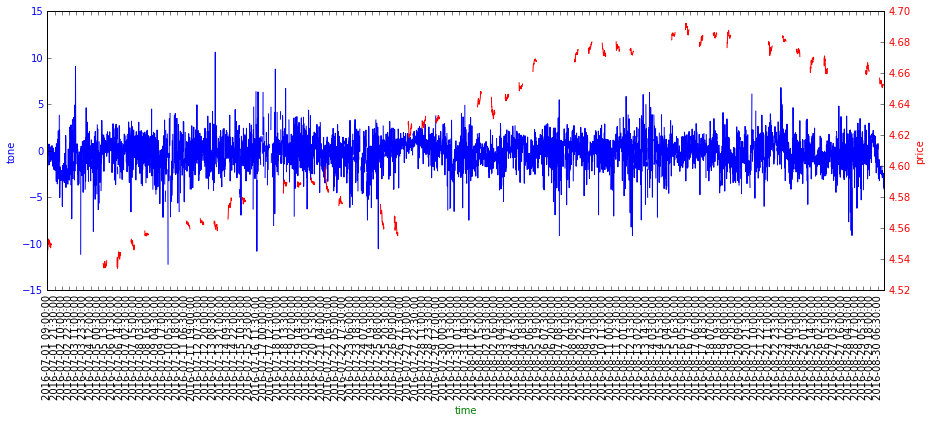

In [29]:
import numpy as np
df_tone = TONE_15_M

start = datetime.datetime.strptime("2016-07-01 09:00:00", '%Y-%m-%d %H:%M:%S')
finish = datetime.datetime.strptime("2016-08-30 18:15:00", '%Y-%m-%d %H:%M:%S')

step = datetime.timedelta(minutes=15)
t = start

time = list()
while t < finish:
    time.append(t)
    t+=step

    
df_tone = df_tone[(df_tone['date'] >= start) & (df_tone['date'] < finish)]
days = intraday[(intraday['date'] >= start) & (intraday['date'] < finish)]

day = pd.DataFrame({'date':[], 'price': []})
f = start


count = 0

while f < finish:
    if f in days.values:
        #day.loc[count] = pd.Series({"date": f, "price": days.loc[days['date'] == f].values[0][1]})
        count+=1
        
        day = day.append({'date': f, 'price': days.loc[days['date'] == f].values[0][1]}, ignore_index=True)
        
    f+=step

#day['price'] = day['price']-(sum(day['price'])/len(day['price']))

lack_tone = list(set(time) - set(list(df_tone['date'])))
lack_intraday = list(set(time) - set(list(intraday['date'])))

count = len(df_tone)



for x in lack_tone:
    #df_tone.loc[count] = pd.Series({"date": x, "tone": np.nan}) DOESN'T WORK WELL :(
    count+=1
    df_tone = df_tone.append({'date': x, 'tone': np.nan}, ignore_index=True)
   



# One of 2 options should be chosen
for x in lack_intraday:
    
    #1) REMOVE ASSIGN THE PRICE TO NAN 
    day = day.append({'date': x, 'price': np.nan}, ignore_index=True)
    
    #2) REMOVE THE TONE WHERE NO PRICE PROVIDED
    #df_tone = df_tone[df_tone['date'] != x]
    #time.remove(x)




df_tone = df_tone.sort_values(by=['date'])    
day = day.sort_values(by=['date'])


# Converting date to pandas datetime format
df_tone['date'] = pd.to_datetime(df_tone['date'])
df_tone['date'] = df_tone["date"].apply(mdates.date2num)

day["date"] = pd.to_datetime(day["date"])
day["date"] = day["date"].apply(mdates.date2num)


f1, ax1 = plt.subplots(figsize = (15,5))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H-%M-%S'))
#ax1.axhline(0, color='black', lw=1)

ax1.set_ylabel('tone', color='blue')
ax1.plot(time, df_tone['tone'], color = 'blue')
ax1.tick_params(axis='y', labelcolor='blue')
time_labels = [str(t) for t in time if time.index(t) % 50 ==0]
ax1.set_xlabel('time', color='green')
ax1.xaxis.set_ticks(time_labels)
ax1.set_xticklabels(time_labels, rotation='vertical', fontdict=None, minor=False)


ax2 = ax1.twinx()  
ax2.set_ylabel('price', color='red')
ax2.plot(time, np.log(day['price']), color='red')
ax2.tick_params(axis='y', labelcolor='red')

## Correlations

In [32]:
day.price = day[day.price != np.nan]
df_tone = df_tone[df_tone.date.isin(day.date)]

In [33]:

pear_cor = df_tone['tone'].corr(day['price'])
print( "(PEARSON CORRELATION){}% of variation in Price could be explained by Tone".format(round(pear_cor**2*100, 2)))

pear_cor = df_tone['tone'].corr(np.log(day['price']))
print( "\n(PEARSON CORRELATION){}% of variation in Log Price could be explained by Tone".format(round(pear_cor**2*100, 2)))

(PEARSON CORRELATION)0.26% of variation in Price could be explained by Tone

(PEARSON CORRELATION)0.26% of variation in Log Price could be explained by Tone


In [34]:
#log_tone = np.log(df_tone['tone'].values)
log_price = np.log(day['price'].values)

In [35]:
from statsmodels.tsa.stattools import adfuller, acf, pacf

### Dicky-Fuller test

In [36]:
adfuller(day['price'])

(2.3278985439429519e-06,
 0.95853227857521217,
 0,
 5796,
 {'1%': -3.4314787437025176,
  '10%': -2.5670355080477196,
  '5%': -2.8620387977390771},
 -255908.31555240875)

In [37]:
"The Dicky-Fuller test p-value result: {} , lags used: {}".format(round(adfuller(day['price'])[1], 2), adfuller(day['price'])[2])

'The Dicky-Fuller test p-value result: 0.96 , lags used: 0'

## Solving unstationarity

In [38]:
# Differencing
diff_day = day['price'].diff()
diff_day = diff_day.dropna()
adfuller(diff_day)

(-406868378.85803616,
 0.0,
 34,
 5761,
 {'1%': -3.4314856042568302,
  '10%': -2.567037121608915,
  '5%': -2.862041828874895},
 -465733.84169724374)

In [39]:
"The Dicky-Fuller test p-value result: {} , lags used: {}".format(round(adfuller(diff_day)[1], 2), adfuller(diff_day)[2])

'The Dicky-Fuller test p-value result: 0.0 , lags used: 34'

#### AUTOCORELATION FUNCTION

/usr/local/lib/python3.5/dist-packages/statsmodels/regression/linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


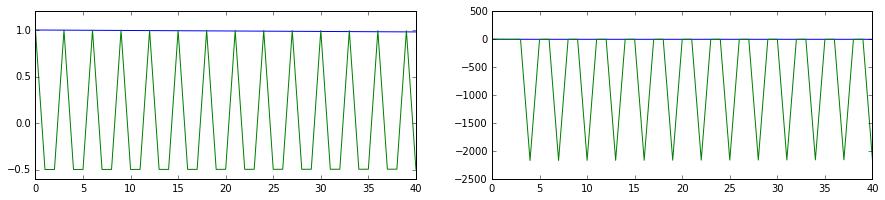

In [40]:
pylab.rcParams['figure.figsize'] = (15, 3) 

plt.figure(1)
plt.subplot(121)
plt.plot(acf(day['price']))
plt.plot(acf(diff_day))


plt.subplot(122)
plt.plot(pacf(day['price']))
plt.plot(pacf(diff_day))

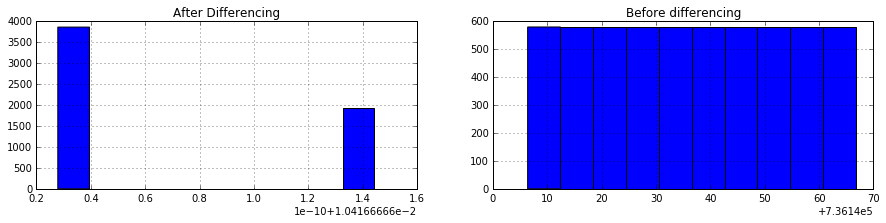

mean1.1 = 0.010417, mean1.2 = 0.010417                     mean2.1 = 736161.463542, mean2.2 = 736191.656250
variance1.1 = 0.000000, variance1.2 = 0.000000             variance2.1 = 75.966634, variance2.2 = 76.019061


In [41]:
plt.figure(1)
plt.subplot(121)
plt.title("After Differencing")
diff_day.hist()

plt.subplot(122)
plt.title("Before differencing")
day['price'].hist()
plt.show()

split = len(diff_day) // 2
X1, X2 = diff_day[0:split], diff_day[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()

split2 = len(day) // 2
X21, X22 = day['price'][0:split2], day['price'][split2:]
mean21, mean22 = X21.mean(), X22.mean()
var21, var22 = X21.var(), X22.var()


print('mean1.1 = %f, mean1.2 = %f' % (mean1, mean2) + '                     mean2.1 = %f, mean2.2 = %f' % (mean21, mean22))
print('variance1.1 = %3f, variance1.2 = %f' % (var1, var2) + '             variance2.1 = %f, variance2.2 = %f' % (var21, var22))


